In [1]:
# praca na plikach
import os

# do ladowania plikow *.mat
from scipy.io import loadmat

# do obslugi macierzy
import numpy as np

# do wyswietlania i skalowania zdjec
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.transform import resize

In [2]:
bmv_annos = loadmat('bmw10_annos')

In [3]:
# pierwszy element
bmv_annos['annos'][0][1]

(array(['10/150302397.jpg'], dtype='<U16'), array([[9]], dtype=uint8), array([[299]]), array([[639]]), array([[213]]), array([[371]]), array([[426]], dtype=uint16), array([[640]], dtype=uint16))

In [4]:
# pierwszy element - nazwa pliku zdjecia
bmv_annos['annos'][0][0][0][0]

'10/150302307.thumb.jpg'

In [5]:
# pierwszy element - klasa
bmv_annos['annos'][0][0][1][0][0]

9

In [6]:
# pierwszy element - bounding box (x1, x2, y1, y2)
(bmv_annos['annos'][0][0][2][0][0], bmv_annos['annos'][0][0][3][0][0], bmv_annos['annos'][0][0][4][0][0], bmv_annos['annos'][0][0][5][0][0])

(42, 217, 32, 163)

In [7]:
# pierwszy element - wielkosc zdjecia (h, w)
(bmv_annos['annos'][0][0][6][0][0], bmv_annos['annos'][0][0][7][0][0])

(183, 275)

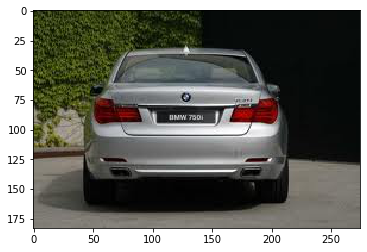

In [8]:
# zdjecie
img_name = 'bmw10_ims/' + bmv_annos['annos'][0][0][0][0]
img = mpimg.imread('bmw10_ims/' + bmv_annos['annos'][0][0][0][0])
imgplot = plt.imshow(img)
plt.show()

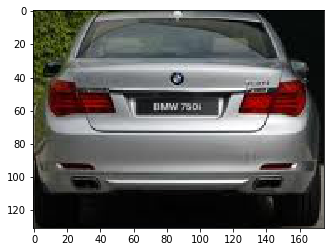

In [11]:
# zdjecie i bounding box
x1 = bmv_annos['annos'][0][0][2][0][0]
x2 = bmv_annos['annos'][0][0][3][0][0]
y1 = bmv_annos['annos'][0][0][4][0][0]
y2 = bmv_annos['annos'][0][0][5][0][0]

imgplot = plt.imshow(img[y1:y2,x1:x2])
plt.show()

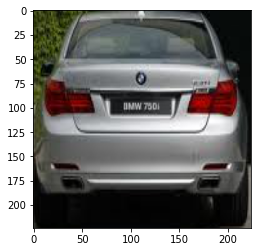

In [12]:
# bounding box w wymiarach 224x224
imgplot = plt.imshow(resize(img[y1:y2,x1:x2], (224, 224), anti_aliasing=True))
plt.show()

In [13]:
# tworzenie zbioru dla kerasa
for row in bmv_annos['annos'][0]:
    img_path = 'bmw10_ims/' + row[0][0]
    img_name = img_path.split('/')[2]
    img_class = row[1][0][0]
    
    img = mpimg.imread(img_path)
    
    if not os.path.isdir('train_keras/' + str(img_class)):
        os.makedirs('train_keras/' + str(img_class))

    x1, x2, y1, y2 = row[2][0][0], row[3][0][0], row[4][0][0], row[5][0][0]
    
    roi = img[y1:y2,x1:x2]

    image_resized = resize(roi, (224, 224), anti_aliasing=True)
    
    plt.imsave('train_keras/' + str(img_class) + '/' + img_name.replace('.thumb', ''), image_resized)

In [14]:
# tworzenie zbioru dla open vino (format imagenet)
if not os.path.isdir('train_imagenet/'):
    os.makedirs('train_imagenet/')

for row in bmv_annos['annos'][0]:
    img_path = 'bmw10_ims/' + row[0][0]
    img_name = img_path.split('/')[2]
    img_class = row[1][0][0]
    
    img = mpimg.imread(img_path)
    x1, x2, y1, y2 = row[2][0][0], row[3][0][0], row[4][0][0], row[5][0][0]
    
    roi = img[y1:y2,x1:x2]

    image_resized = resize(roi, (224, 224), anti_aliasing=True)
    
    plt.imsave('train_imagenet/' + img_name.replace('.thumb', ''), image_resized)
    
    with open('train_imagenet/001_val.txt', 'a') as file:
        file.write(img_name.replace('.thumb', '') + ' ' + str(img_class) + '\n')